**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.k = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if self.algorithm == 'brute':
            self.train_examples = X
        elif self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(X, leaf_size=100)
        else:
            raise RuntimeError('Unknown algorithm ' + str(self.algorithm))
        self.unique_labels = np.unique(y)
        self.train_labels = np.empty(y.shape, dtype=np.int64)
        for i in range(self.unique_labels.shape[0]):
            label = self.unique_labels[i]
            self.train_labels[np.where(y == label)] = i

    def _get_n_closest_labels(self, X):
        if self.algorithm == 'brute':
            distances = cdist(X, self.train_examples)
            n_closest_indexes = np.argpartition(
                distances,
                self.k,
                axis=1
            )[:, :self.k]
            return self.train_labels[n_closest_indexes]
        elif self.algorithm == 'kd_tree':
            return self.train_labels[self.kd_tree.query(
                X,
                self.k,
                return_distance=False
            )]
        else:
            raise RuntimeError('Unknown algorithm ' + str(self.algorithm))

    def predict(self, X):
        return self.unique_labels[self.predict_proba(X).argmax(axis=1)]

    def predict_proba(self, X):
        n_closest_labels = self._get_n_closest_labels(X)
        counted_labels = np.apply_along_axis(
            lambda a: np.bincount(a, minlength=self.unique_labels.shape[0]),
            1,
            n_closest_labels
        )
        return counted_labels / self.k

    def score(self, X, y):
        prediction = self.predict(X)
        return 1.0 - np.sum(prediction != y) / X.shape[0]

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 1.19 ms, sys: 287 µs, total: 1.48 ms
Wall time: 1.19 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 248 µs, sys: 59 µs, total: 307 µs
Wall time: 247 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 2.85 ms, sys: 700 µs, total: 3.55 ms
Wall time: 2.91 ms


array([1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.52 ms, sys: 216 µs, total: 1.73 ms
Wall time: 921 µs


array([1, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 0 ns, sys: 1.36 ms, total: 1.36 ms
Wall time: 1.13 ms


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.4 ms, sys: 0 ns, total: 1.4 ms
Wall time: 971 µs


array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

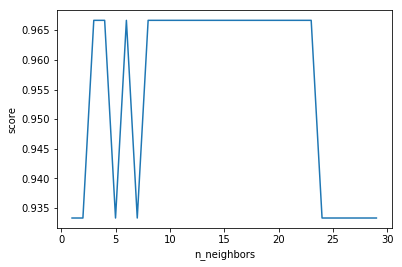

In [14]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target)
x_plot = list(range(1, X_test.shape[0]))
y_plot = []
for n_neighbors in x_plot:
    my_clf = MyKNeighborsClassifier(n_neighbors=n_neighbors)
    my_clf.fit(X_train, y_train)
    y_plot.append(my_clf.score(X_test, y_test))
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.plot(x_plot, y_plot, label='my')
best_n_neighbors = np.asarray(y_plot).argmax() + 1

**MNIST**

In [15]:
#mnist = fetch_mldata('MNIST original')
mnist = fetch_openml('mnist_784')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [17]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [18]:
%time clf.fit(X_train, y_train)

CPU times: user 57.6 s, sys: 95.6 ms, total: 57.7 s
Wall time: 57.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [19]:
%time my_clf.fit(X_train, y_train)

CPU times: user 72.7 ms, sys: 0 ns, total: 72.7 ms
Wall time: 71.3 ms


In [20]:
%time clf.predict(X_test)

CPU times: user 1min 18s, sys: 308 ms, total: 1min 18s
Wall time: 1min 18s


array(['7', '5', '9', '9', '7', '0', '4', '0', '2', '7', '7', '4', '9',
       '3', '2', '4', '9', '6', '1', '6', '8', '0', '1', '6', '1', '3',
       '0', '3', '4', '3', '9', '1', '3', '7', '5', '8', '6', '2', '2',
       '9', '1', '5', '9', '0', '6', '2', '0', '4', '5', '0', '2', '7',
       '5', '9', '3', '1', '0', '5', '1', '8', '0', '9', '3', '0', '4',
       '3', '1', '0', '7', '1', '0', '5', '4', '3', '9', '1', '2', '8',
       '8', '7', '3', '1', '6', '6', '5', '3', '9', '9', '0', '4', '3',
       '6', '7', '2', '4', '2', '9', '9', '3', '4', '6', '1', '2', '0',
       '7', '4', '8', '4', '5', '4', '3', '5', '7', '4', '3', '5', '0',
       '7', '7', '4', '7', '1', '5', '1', '2', '0', '2', '2', '3', '9',
       '9', '0', '9', '7', '2', '1', '3', '1', '1', '4', '3', '1', '1',
       '7', '5', '6', '0', '6', '4', '7', '9', '2', '9', '4', '9', '9',
       '1', '6', '4', '5', '0', '6', '8', '5', '5', '9', '6', '8', '5',
       '0', '0', '7', '9', '2', '1', '7', '8', '0', '4', '4', '4

In [21]:
%time my_clf.predict(X_test)

CPU times: user 32.3 s, sys: 460 ms, total: 32.7 s
Wall time: 32.7 s


array(['7', '5', '9', '9', '7', '0', '4', '0', '2', '7', '7', '4', '9',
       '3', '2', '4', '9', '6', '1', '6', '8', '0', '1', '6', '1', '3',
       '0', '3', '4', '3', '9', '1', '3', '7', '5', '8', '6', '2', '2',
       '9', '1', '5', '9', '0', '6', '2', '0', '4', '5', '0', '2', '7',
       '5', '9', '3', '1', '0', '5', '1', '8', '0', '9', '3', '0', '4',
       '3', '1', '0', '7', '1', '0', '5', '4', '3', '9', '1', '2', '8',
       '8', '7', '3', '1', '6', '6', '5', '3', '9', '9', '0', '4', '3',
       '6', '7', '2', '4', '2', '9', '9', '3', '4', '6', '1', '2', '0',
       '7', '4', '8', '4', '5', '4', '3', '5', '7', '4', '3', '5', '0',
       '7', '7', '4', '7', '1', '5', '1', '2', '0', '2', '2', '3', '9',
       '9', '0', '9', '7', '2', '1', '3', '1', '1', '4', '3', '1', '1',
       '7', '5', '6', '0', '6', '4', '7', '9', '2', '9', '4', '9', '9',
       '1', '6', '4', '5', '0', '6', '8', '5', '5', '9', '6', '8', '5',
       '0', '0', '7', '9', '2', '1', '7', '8', '0', '4', '4', '4

In [22]:
%time clf.predict_proba(X_test)

CPU times: user 1min 14s, sys: 56.1 ms, total: 1min 14s
Wall time: 1min 14s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0.5, 0. ]])

In [23]:
%time my_clf.predict_proba(X_test)

CPU times: user 32.3 s, sys: 464 ms, total: 32.8 s
Wall time: 32.8 s


array([[0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.5, 0. , ..., 0. , 0.5, 0. ]])

In [24]:
clf.score(X_test, y_test)

0.9657142857142857

In [25]:
my_clf.score(X_test, y_test)

0.9657142857142857

Задание 4

In [26]:
clf = KNeighborsClassifier(n_neighbors=best_n_neighbors, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=best_n_neighbors, algorithm='kd_tree')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [28]:
%time clf.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 192 ms, total: 1min 8s
Wall time: 1min 8s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [29]:
%time my_clf.fit(X_train, y_train)

CPU times: user 1min 6s, sys: 185 ms, total: 1min 7s
Wall time: 1min 6s


In [30]:
%time clf.predict(X_test)

CPU times: user 1min 16s, sys: 244 ms, total: 1min 16s
Wall time: 1min 16s


array(['1', '7', '6', '5', '5', '1', '3', '6', '4', '9', '3', '6', '0',
       '1', '9', '9', '0', '7', '4', '2', '4', '7', '1', '6', '1', '1',
       '7', '1', '6', '2', '9', '5', '6', '1', '7', '7', '7', '5', '0',
       '1', '9', '3', '8', '1', '2', '7', '5', '1', '7', '4', '4', '8',
       '4', '1', '9', '5', '2', '0', '1', '1', '1', '1', '3', '9', '1',
       '8', '8', '8', '9', '6', '8', '7', '0', '0', '9', '8', '0', '3',
       '9', '7', '9', '7', '4', '3', '9', '3', '3', '1', '5', '3', '9',
       '6', '0', '3', '3', '0', '0', '0', '8', '0', '9', '5', '9', '7',
       '4', '2', '4', '0', '9', '8', '2', '0', '1', '2', '8', '8', '7',
       '2', '5', '9', '5', '9', '5', '3', '3', '5', '7', '2', '1', '1',
       '2', '3', '7', '2', '2', '0', '7', '7', '6', '4', '0', '8', '8',
       '6', '2', '0', '2', '1', '5', '1', '0', '2', '4', '3', '2', '3',
       '1', '1', '9', '8', '1', '5', '7', '9', '4', '4', '9', '2', '3',
       '5', '0', '6', '6', '5', '8', '1', '7', '5', '9', '9', '8

In [31]:
%time my_clf.predict(X_test)

CPU times: user 53 s, sys: 18 µs, total: 53 s
Wall time: 53 s


array(['1', '7', '6', '5', '5', '1', '3', '6', '4', '9', '3', '6', '0',
       '1', '9', '9', '0', '7', '4', '2', '4', '7', '1', '6', '1', '1',
       '7', '1', '6', '2', '9', '5', '6', '1', '7', '7', '7', '5', '0',
       '1', '9', '3', '8', '1', '2', '7', '5', '1', '7', '4', '4', '8',
       '4', '1', '9', '5', '2', '0', '1', '1', '1', '1', '3', '9', '1',
       '8', '8', '8', '9', '6', '8', '7', '0', '0', '9', '8', '0', '3',
       '9', '7', '9', '7', '4', '3', '9', '3', '3', '1', '5', '3', '9',
       '6', '0', '3', '3', '0', '0', '0', '8', '0', '9', '5', '9', '7',
       '4', '2', '4', '0', '9', '8', '2', '0', '1', '2', '8', '8', '7',
       '2', '5', '9', '5', '9', '5', '3', '3', '5', '7', '2', '1', '1',
       '2', '3', '7', '2', '2', '0', '7', '7', '6', '4', '0', '8', '8',
       '6', '2', '0', '2', '1', '5', '1', '0', '2', '4', '3', '2', '3',
       '1', '1', '9', '8', '1', '5', '7', '9', '4', '4', '9', '2', '3',
       '5', '0', '6', '6', '5', '8', '1', '7', '5', '9', '9', '8

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 1min 19s, sys: 28 ms, total: 1min 19s
Wall time: 1min 19s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [33]:
%time my_clf.predict_proba(X_test)

CPU times: user 53.3 s, sys: 0 ns, total: 53.3 s
Wall time: 53.3 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf.score(X_test, y_test)

0.9685714285714285

In [35]:
my_clf.score(X_test, y_test)

0.9685714285714285

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных
# matplotlib - библиотека для рисования графиков
# train_test_split - функция для разделения выборки на две части случайным образом
# Pipeline (from sklearn.pipeline import Pipeline) - класс для конвейерного применения моделей
# StandardScaler (from sklearn.preprocessing import StandardScaler) - класс для приведения данных (делает матожидание равным 0, а дисперсию равной 1)
# ClassifierMixin - класс, реализующий метод score
# NeighborsBase - класс для оценочный функций
# KNeighborsMixin - класс, реализующий поиск k ближайших соседей
# SupervisedIntegerMixin - класс для классификации по конечному множеству целых чисел